In [2]:
# 모듈 로딩
from turtle import distance
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import platform
import numpy as np

In [3]:
# 도미 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 
                38.5, 38.5, 39.5, 41.0, 41.0]

bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 
                475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 
                575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 
                920.0, 955.0, 925.0, 975.0, 950.0]

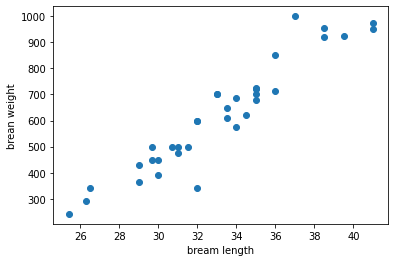

In [4]:
# 도미 데이터 산점도
plt.scatter(bream_length, bream_weight)
plt.xlabel('bream length')
plt.ylabel('brean weight')
plt.show()

In [5]:
# 빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

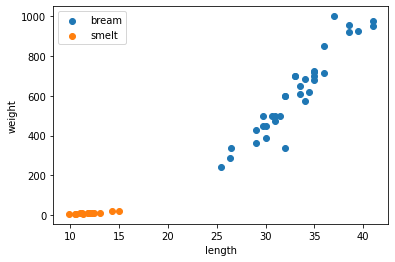

In [6]:
# 빙어 데이터 산점도
plt.scatter(bream_length,bream_weight,label='bream') # 도미 산점도
plt.scatter(smelt_length,smelt_weight,label='smelt') # 빙어 산점도
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [7]:
# 길이외 무게 데이터 합치기
length=bream_length+smelt_length
weight=bream_weight+smelt_weight

- length와 weight에는 도미와 빙어 모두의 데이터가 다 들어가있고  
  0~34인덱스까지는 도미 35인덱스부터는 빙어가 들어가 있음

In [8]:
# 1차원 데이터를 2차원 리스트로 변경
fish_data=[[l,w] for l,w in zip(length,weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [9]:
# 정답 데이터
# 1은 도미, 2는 빙어
fish_target=[1]*35+[0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [10]:
# KNN
## 모델생성
kn=KNeighborsClassifier()

- n_neighbors=옵션은 기본값이 5

In [11]:
## 모델훈련
kn.fit(fish_data,fish_target)

KNeighborsClassifier()

- fit(훈련 데이터,정답 데이터)

In [12]:
## 모델평가
kn.score(fish_data,fish_target)

1.0

- score(테스트 데이터,정답 데이터)

In [13]:
## 새로운 데이터로 예측
kn.predict([[30,600]])

array([1])

- predict(새로운데이터로 이중리스트)
- 이중리스트로 안하면 오류뜸=>튜플로 바꾸어도 오류 오로지 리스트

In [14]:
## 한글폰트
if platform.system()=='Windows':
    plt.rc('font',family='Malgun Gothic')
else:
    plt.rc('font',family='AppleGothic')

In [15]:
# 모델 출력값
print("score: ",kn.score(fish_data,fish_target))
print("predict: ",kn.predict([[30,600]])) # [1]=>도미로 예측, [0]=>빙어로 예측

score:  1.0
predict:  [1]


- 정확도는 1이고 예측은 도미임

## 길이 20cm, 무게 90kg 물고기 빙어로 예측하기

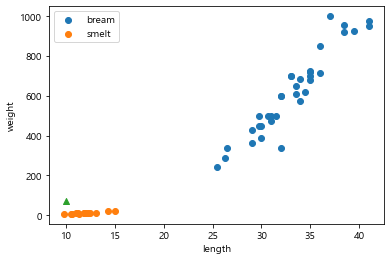

score:  1.0
predict:  [0]


In [16]:
kn=KNeighborsClassifier(n_neighbors=5) # 비교할 이웃의 개수
plt.scatter(bream_length,bream_weight,label='bream') # 도미 산점도
plt.scatter(smelt_length,smelt_weight,label='smelt') # 빙어 산점도
plt.scatter(10,70,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()
kn.fit(fish_data,fish_target)
print("score: ",kn.score(fish_data,fish_target))
print("predict: ",kn.predict([[20,90]])) # [1]=>도미로 예측, [0]=>빙어로 예측

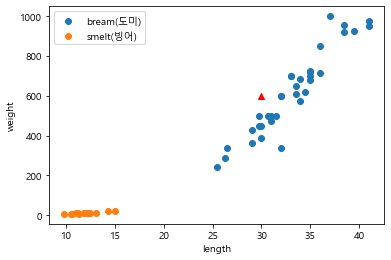

In [17]:
## 산점도 그리기
plt.scatter(bream_length,bream_weight,label='bream(도미)')
plt.scatter(smelt_length,smelt_weight,label='smelt(빙어)')
plt.scatter(30,600,marker='^',color='red')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [50]:
# 속성
print(f"데이터\n{kn._fit_X}")
print(f"타겟\n{kn._y}")
print(f"분류종류 {kn.classes_}")

데이터
[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.17057727 -0.28177396]
 [ 0.5712808   0.76060496]
 [ 0.34087627  0.14198246]
 [ 1.12224816  1.54934866]
 [ 0.62136874  0.60594934]
 [-1.30200822 -1.34363949]
 [ 0.42101698  0.14198246]
 [-0.19005591 -0.65604058]
 [-1.75279969 -1.38384995]
 [ 0.47110492  0.45129371]
 [-1.68267658 -1.38137546]
 [ 0.62136874  0.48222484]
 [-1.67265899 -1.38292202]
 [ 0.77163257  0.76060496]
 [ 0.47110492  0.45129371]
 [ 0.77163257  0.83793278]
 [-1.43223687 -1.36683783]
 [ 0.27075315 -0.01267317]
 [ 0.47110492 -0.35291555]
 [-1.2318851  -1.34302087]
 [ 0.27075315 -0.19825992]
 [ 1.37268787  1.61121091]]
타겟
[1 0 1 0 1 1 1 1 1 1

- knn은 회귀계수와 절편으로 구하는 것이 아니므로 coef_나 intercept_등을 해도 값이 안 나옴

In [19]:
# n_neighbors값 변경 49로
kn=KNeighborsClassifier(n_neighbors=49)
kn.fit(fish_data,fish_target)
kn.score(fish_data,fish_target)
print(kn.predict([[30,600]]))
print(kn.predict([[0,0]]))

[1]
[1]


- 이웃수가 49이므로 주변 이웃중 도미가 당연히 많으므로 예측값은 1이 나옴

In [20]:
# zip함수의 해제
list=[('eng',20),('kor',30),('math',80),('sci',50)]
a,b=zip(*list)
print(a) 
print(b)

tuple=(('eng',20),('kor',30),('math',80),('sci',50))
a,b=zip(*tuple)
print(a) 
print(b)

('eng', 'kor', 'math', 'sci')
(20, 30, 80, 50)
('eng', 'kor', 'math', 'sci')
(20, 30, 80, 50)


- list나 tuple이나 모두 zip로 해제가 가능함

In [21]:
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [22]:
type(fish_data)

list

In [23]:
# 훈련/테스트로 나누기
# fish_data는 numpy.ndarray타입임
train_input = fish_data[:35] # 도미만
train_target = fish_target[:35] # 도미만

test_input = fish_data[35:] # 빙어만
test_target = fish_target[35:] # 빙어만

kn=KNeighborsClassifier()
kn=kn.fit(train_input,train_target)
kn.score(test_input,test_target)

0.0

- 값이 0이 나온다.  
  그이유는 훈련데이터에는 도미 데이터만 테스트 데이터에는 빙어 데이터만 있으므로

In [24]:
# list를 array로 변경
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr)
print(input_arr.shape)
print(type(input_arr)) # numpy.ndarray타입

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
(49, 2)
<class 'numpy.ndarray'>


In [25]:
# 랜덤 인덱스 뽑기
np.random.seed(42)
index_list = np.arange(49) # 0~48까지 값을 가지는 배열 생성
print(index_list)

np.random.shuffle(index_list)
print(index_list)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [26]:
# 랜덤 인덱스로 훈련/테스트 데이터 뽑기
train_input = input_arr[index_list[:35]]
train_target = target_arr[index_list[:35]]

test_input = input_arr[index_list[35:]]
test_target = target_arr[index_list[35:]]

- train_와 test_에는 이제 데이터가 마구 섞여 있음

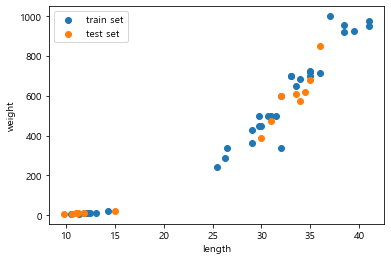

In [27]:
# 랜덤된 훈련/테스트데아터로 그래프 그리기
plt.scatter(train_input[:,0],train_input[:,1],label='train set')
plt.scatter(test_input[:,0],test_input[:,1],label='test set')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [51]:
# 셔플된 데이터의 knn
kn=KNeighborsClassifier()
kn=kn.fit(train_input,train_target)
print("score: ", kn.score(test_input,test_target))
print("예측:",kn.predict(test_input))
print("실제:", test_target)

score:  1.0
예측: [0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
실제: [0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


- 실제 데이터와 예측데이터의 정확도는 100%라는 것을 확인

predict(길이 25cm, 무게 150g): [0]


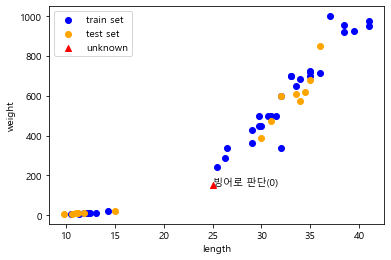

In [29]:
# 문제점
print(f"predict(길이 25cm, 무게 150g): {kn.predict([[25,150.0]])}")

# 문제점 그래프 그리기
plt.scatter(train_input[:,0],train_input[:,1],label='train set',color='blue')
plt.scatter(test_input[:,0],test_input[:,1],label='test set',color='orange')
plt.scatter(25,150,label='unknown',color='r',marker='^')
plt.text(25,150,'빙어로 판단(0)')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [30]:
# column_stack
fish_length=bream_length+smelt_length
fish_weight=bream_weight+smelt_weight
fish_data=np.column_stack((fish_length,fish_weight)) 
print(type(fish_data))
print(fish_data[:5])

<class 'numpy.ndarray'>
[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [31]:
# np.ones,np.zero
print(np.ones(35))
print(np.zeros(14))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


- np.ones나 np.zeros는 배열로 생성

In [52]:
# concatenate
fish_target=np.concatenate((np.ones(35),np.zeros(14)))

- concatenate는 무조건 튜플 형태로 넣어주어야 작동함  
  2개의 배열을 서로 연결해주는 함수

In [33]:
# 사이킷런으로 훈련/테스트 세트 나누기
train_input,test_input,train_target,test_target=train_test_split(fish_data,fish_target,stratify=fish_target,random_state=42)
print('train_input.shape: ',train_input.shape,
      'test_input.shape',test_input.shape)
print('train_input.shape: ',train_target.shape,
      'test_input.shape',test_target.shape)      

train_input.shape:  (36, 2) test_input.shape (13, 2)
train_input.shape:  (36,) test_input.shape (13,)


- fish_data/fish_target는 배열로 random_state=옵션은 42시드로 설정하여 값을 나누어 줌

In [34]:
# knn모델 적용
kn=KNeighborsClassifier()
kn.fit(train_input,train_target)
print(f"score: {kn.score(test_input,test_target)}")

print(kn.predict([[25,150]]))

score: 1.0
[0.]


- 도미(1)로 나올줄 알았는데 0인 빙어로 예측함

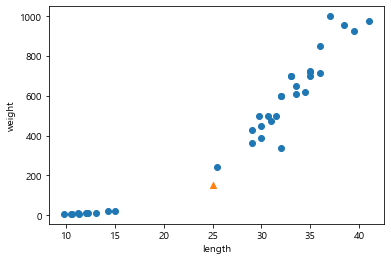

In [35]:
# 길이 25cm 무게 150g 생선 산점도로 표현
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [36]:
# 이웃과 거리계산
distances, indexes=kn.kneighbors([[25,150]])
print(distances)
print(indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


- kn.kneighbors()함수로 이웃의 거리나 인덱스를 구할 수 있음

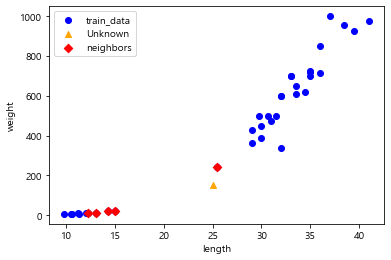

In [37]:
# 가까운 이웃 5개를 산점도로 표시
plt.scatter(train_input[:,0],train_input[:,1],label='train_data',color='b')
plt.scatter(25,150,marker='^',color='orange',label='Unknown')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D',label='neighbors',color='r')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [38]:
# 이웃점의 특성값
print('neighbors: ', train_input[indexes])
print('target: ', train_target[indexes])
print(distances)

neighbors:  [[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
target:  [[1. 0. 0. 0. 0.]]
[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


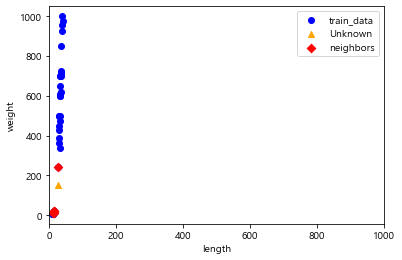

In [39]:
# x/y축 범위 동일하세 수정
plt.scatter(train_input[:,0],train_input[:,1],label='train_data',color='b')
plt.scatter(25,150,marker='^',color='orange',label='Unknown')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D',label='neighbors',color='r')
plt.xlim((0,1000)) # x범위를 정해서 점들을 다 왼쪽으로 밀어넣기
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [40]:
# 데이터 전처리
mean=np.mean(train_input,axis=0) # 열을 기준
std=np.std(train_input,axis=0) # 열을 기준
print(mean,std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [41]:
# Z값 구하기
train_scaled=(train_input-mean)/std
print(train_scaled[:3])

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]]


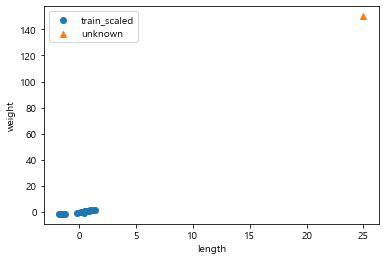

In [42]:
# 표준 점수와 25,150 비교
plt.scatter(train_scaled[:,0],train_scaled[:,1],label='train_scaled')
plt.scatter(25,150,marker='^',label='unknown')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [43]:
# 샘플도 표준점수로
new=([25,150]-mean)/std
print(f"표준점수 sample {new}")

표준점수 sample [-0.23012627 -0.94060693]


c:\ProgramData\Anaconda3\envs\EV_PY39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


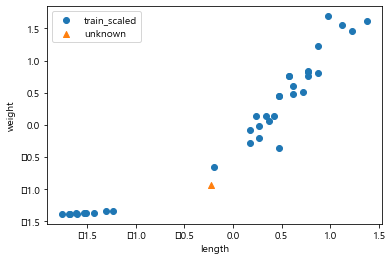

In [44]:
# 표준그래프 그리기
plt.scatter(train_scaled[:,0],train_scaled[:,1],label='train_scaled')
plt.scatter(new[0],new[1],marker='^',label='unknown')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [45]:
# 표준점수 변환후 knn모델
kn.fit(train_scaled,train_target)

KNeighborsClassifier()

In [46]:
# 테스트 세트를 표준 점수로 변환
test_scaled=(test_input-mean)/std
 

In [47]:
# 표준점수로 변환된 테스트데이터를 가지고 예측
print(kn.predict([new]))

[1.]


- 표준화된 데이터로는 정확하게 도미로 인식을 함

[[0.2873737  0.7711188  0.89552179 0.91493515 0.95427626]]


c:\ProgramData\Anaconda3\envs\EV_PY39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


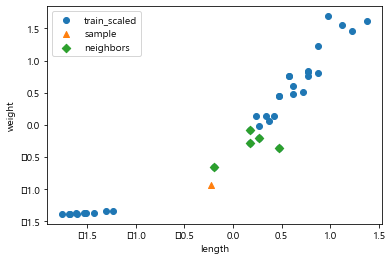

<class 'list'>


In [48]:
# 표준 점숩로 변경된 샘플 데이터의 이웃찾기 및 산점도
distances,indexes=kn.kneighbors([new])
print(distances)

plt.scatter(train_scaled[:,0],train_scaled[:,1],label='train_scaled')
plt.scatter(new[0],new[1],marker='^',label='sample')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D',label='neighbors')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

print(type([[new]]))
